# Tarea 1: Resolución




Sea la señal $$f(t)=7+ 3\;cos(22\pi t) + sen(16 \pi t)$$ con $t \in \mathbb{R} $ medido en segundos.

1. Analice los componentes de frecuencias la señal  $f$.
2. Digitalice la señal  f  con un período de muestreo de 0.001 s, en el intervalo $t \in [0,0.8)$
3. Calcule la frecuencia de muestreo y la cantidad de muestras.
4. Grafique la señal muesteada en función del tiempo.
5. Analice la señal  f   según sus componentes de frecuencia, para esto utilice la transformada de Fourier de la señal muestreada punto N=700. Grafique su magnitud en función de la frecuencia en Hertz, ubique la frecuencia de Nyquist del muestreo en la gráfica . Cotejar con lo analizado en el item 1.
6. Se puede reconstruir la señal muestreada en el item 1 utilizando el resultado del item 4? se ha realizado un Zero padding o un truncamiento?



Instalamos la librerías y sublibrerías necesarias para la notebook

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftshift,ifft #funciones para trabajar con la Transformada de Fourier

1)  Analice los componentes de frecuencias la señal  $f$.



La señal $f$ tiene $3$ componentes de frecuencia. Estas componentes son:

Frecuencia $0$ que tiene una amplitud cuyo valor es $7$.

Frecuencia $11$ que tiene una amplitud cuyo valor es $3$.

Frecuencia $8$ que tiene una amplitud cuyo valor es $1$.

2) Digitalice la señal  f  con un período de muestreo de 0.001 s, en el intervalo $t \in [0,0.8)$

In [2]:
Tm=0.001 #período de muestreo, es decir, distancia en tiempo entre muestra y muestra
t=np.arange(0,0.8,Tm) #armado del vector digitalizado de tiempos entre 0 y 0.08 segundos
f=7+3*np.cos(22*np.pi*t)+np.sin(16*np.pi*(t)) #digitalización de la señal


3) Calcule la frecuencia de muestreo y la cantidad de muestras.

In [ ]:
Fm=1/Tm #cálculo de la frecuencia de muestreo
Cm=len(t) #cálculo de la cantidad de muestras en el período t

#Impresión de estos resultados
print('Frecuencia de muestreo = ', Fm)
print('Cantidad de muestras obtenidas en 0.8 segundos = ', len(t))

Frecuencia de muestreo =  1000.0
Cantidad de muestras obtenidas en 0.8 segundos =  800


4) Grafique la señal muesteada en función del tiempo.

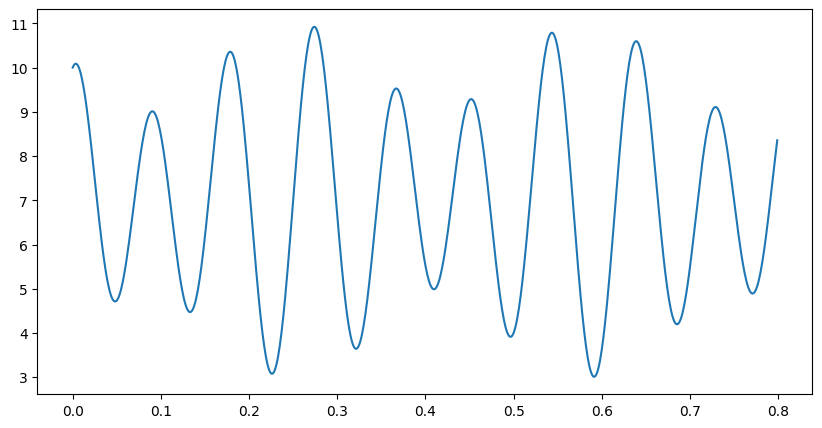

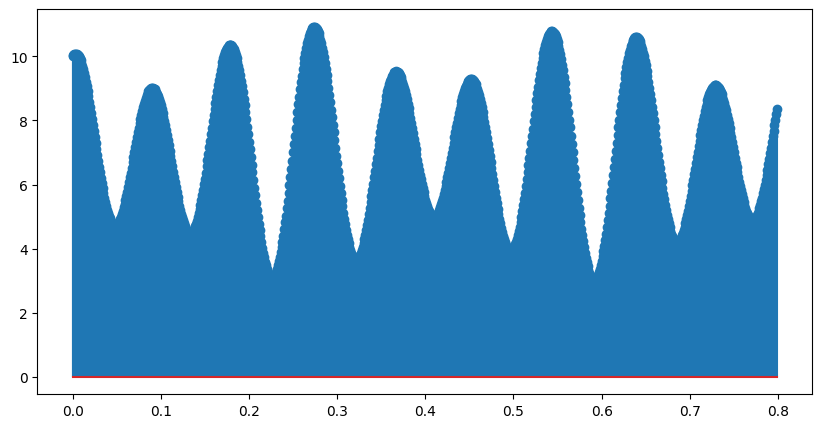

In [ ]:
plt.figure(figsize=(10,5)) #se define el tamaño del nuevo gráfico
plt.plot(t,f)
plt.show() #se muestra el gráfico, este comando se utiliza cuando hay más de un gráfico a mostrar en un mismo bloque de código
plt.figure(figsize=(10,5)) #se define el tamaño del nuevo gráfico
plt.stem(t,f) #gráfico de señal discreta
plt.show()  #se muestra el gráfico, este comando se utiliza cuando hay más de un gráfico a mostrar en un mismo bloque de código

5) Analice la señal $f$   según sus componentes de frecuencia, para ello utilice la transformada de Fourier de la señal muestreada punto N=700. Grafique su magnitud en función de la frecuencia en Hertz, ubique la frecuencia de Nyquist del muestreo en la gráfica . Cotejar con lo analizado en el item 1.

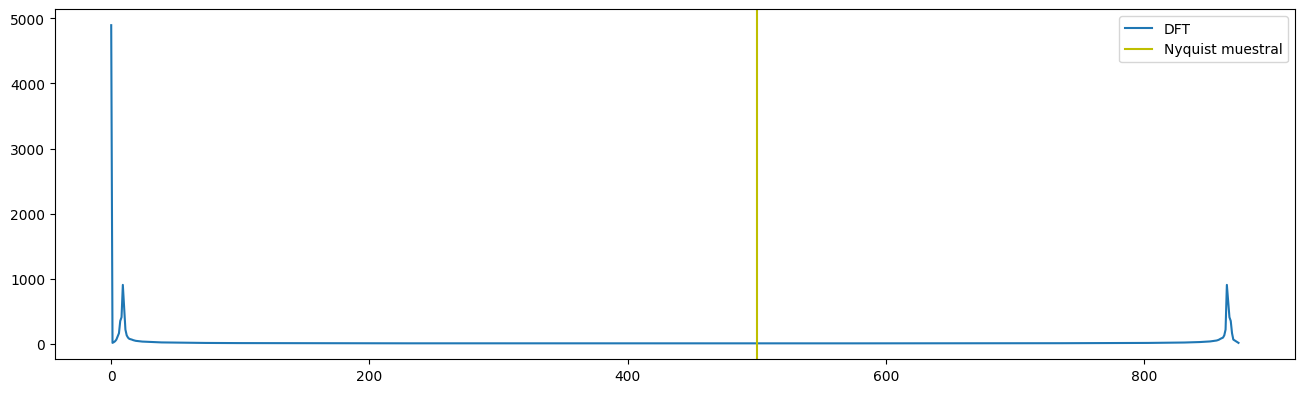

In [ ]:
N=700 #punto N, es decir, cantidad de muestras utilizadas para calcular la Transformada de Fourier
Ftf=fft(f,N) #cálculo de la DFT punto N
FH=np.arange(700)//0.7
Nm= Fm//2 #Frecuencia de Nyquist
plt.figure(figsize=(16,10)) #se define el tamaño del nuevo gráfico
plt.subplot(211) #se define la posición en la que irá la primer figura
plt.plot(FH,abs(Ftf))
plt.axvline(Nm,c="y") #aca agregamos la Frecuencia de Nyquist muestral,  es la máxima que se puede registrar
plt.legend(["DFT", "Nyquist muestral"]) #frec max de la señal real muestreada, luego se refleja

plt.show()

De la gráfica se observa que la señal tiene tres componentes de frecuencia, coincide con los dicho en el apartado (a). La de mayor pico es la de frecuencia cero, luego está la componente de frecuencia 11 con amplitud 3 y por último la componente de frecuencia 8 con amplitud 1.

6) Se puede reconstruir la señal muestreada en el item 1 utilizando el resultado del item 4? se ha realizado un Zero padding o un truncamiento?


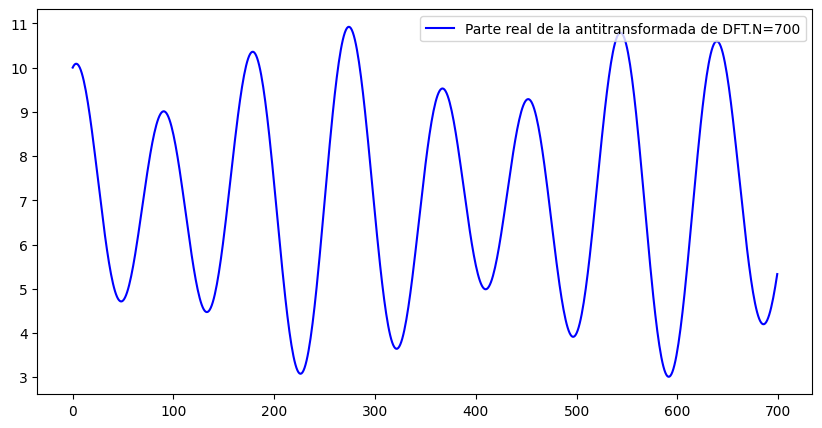

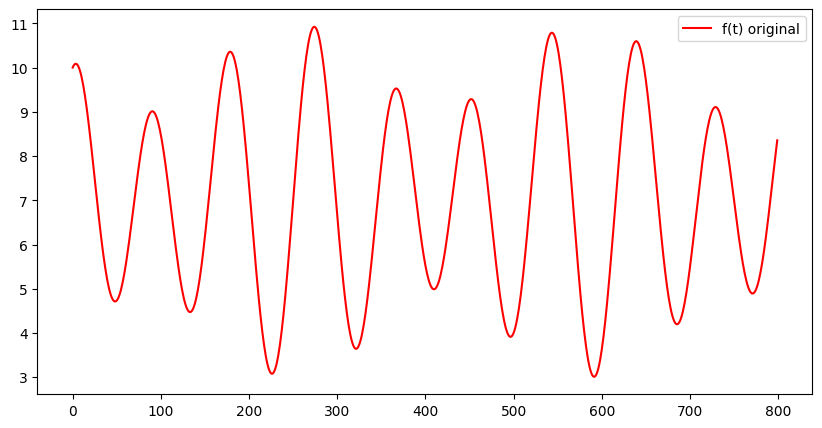

La señal original y la antitransformada de la DFT.N difieren en 100 muestras


In [ ]:
IFtf=ifft(Ftf) #se hace la antitransformada de la DFT punto N, con N=700
plt.figure(figsize=(10,5))
plt.plot(np.real(IFtf), color='blue', label='Parte real de la antitransformada de DFT.N=700') #se grafica solo la parte real
plt.legend(loc='upper right')
plt.show()

plt.figure(figsize=(10,5)) #se define el tamaño del nuevo gráfico
plt.plot(f, color='red', label='f(t) original') #se grafica la señal original
plt.legend(loc='upper right')
plt.show()

DifM=len(f)-len(np.real(IFtf))
print('La señal original y la antitransformada de la DFT.N difieren en '+str(DifM)+' muestras') #se calcula e imprime la diferencia en muestras para establecer si las señales tienen la misma cantidad, se realizó truncamiento o zero padding

Se concluye que las señales no tienen la misma cantidad de muestras, la reconstruída tiene menos por lo que no se puede reconstruir la señal muestreada en el item 1 utilizando el resultado del item 4.
Además se ha realizado un truncamiento.